# The Curse of Dimensionality

The curse of dimensionality is a phenomenon that occurs when dealing with high-dimensional data in which the amount of data required to make accurate predictions or estimates grows exponentially with the number of dimensions. In other words, as the number of dimensions increases, the data becomes increasingly sparse and the amount of data required to obtain a good estimate of a function or distribution grows exponentially.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

 We create a function to generates a dataset with a specified number of samples and dimensions, consisting of two classes of data points that are normally distributed.

Also, the pairwise Euclidean distances between all pairs of data points are computed using the cdist function from the scipy.spatial.distance module. The resulting distances are flattened into a one-dimensional array, which is returned along with the standardized data.

In [8]:
def generate_data(samples,dims):
    class_1_data = np.random.normal(0,1,(samples,dims))
    class_2_data = np.random.normal(3,1,(samples,dims))
    data = np.concatenate([class_1_data, class_2_data], axis=0)
    
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    
    return data, cdist(data, data, metric='euclidean').flatten()

### Plotting generated data.

seaborn is used to create a kernel density estimation (KDE) plot of the Euclidean distances between all pairs of points in the data variable. The KDE plot shows the distribution of pairwise distances between the data points, which gives an indication of how spread out the data is in the one-dimensional space.

[[-0.16162712]
 [-1.25319721]
 [-1.66332323]
 [-1.29808259]
 [-1.24200117]]


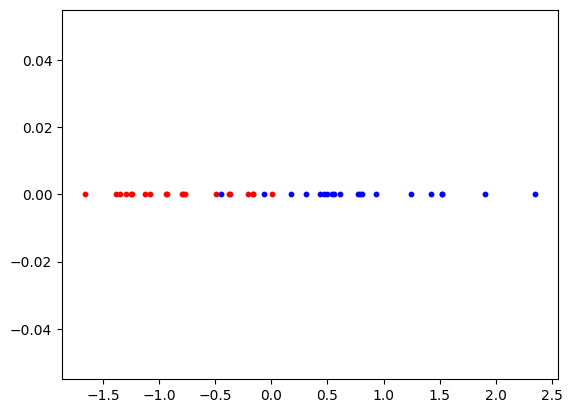

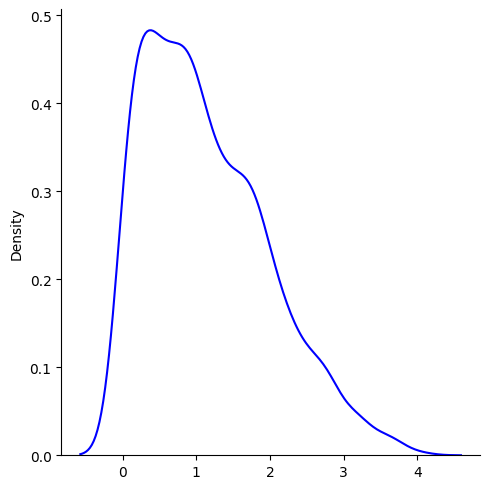

In [23]:
#get 1 dimensional data
samples = 20

data, distance = generate_data(samples, 1)
print(data[:5])
plt.scatter(data[:samples], [0]*samples, s=10, color='r')
plt.scatter(data[samples:], [0]*samples, s=10, color='b')
plt.show()
sns.displot(data=distance, kind="kde", color='b')
plt.show()

From the distribution plot above we observe the majority of euclidean distances range 0-1 with average around 0.5

### Plotting generated data in 2-dimensional space.

Using a scatter plot in two dimensional representation of our generated data we plot the data points again.

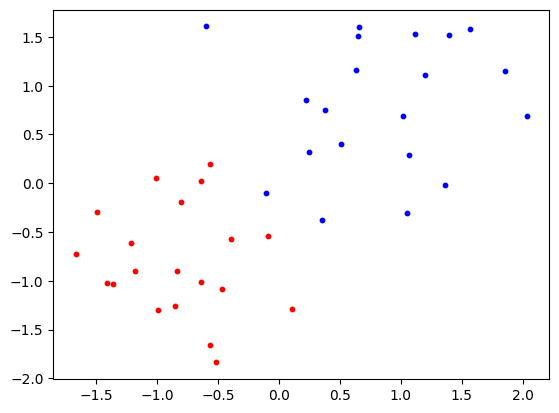

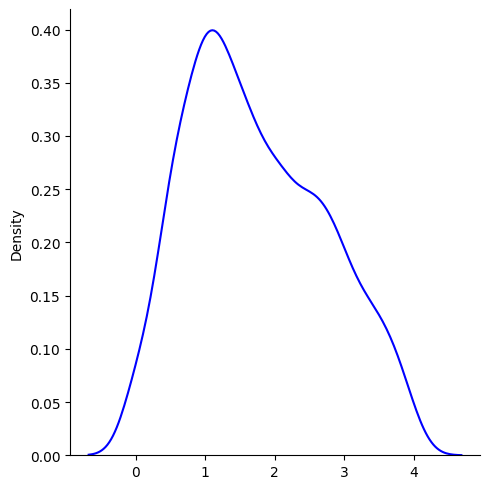

In [17]:
# Get 2-dimensional data
data, distance = generate_data(samples, 2)

# Plot the data points
plt.scatter(data[:samples, 0], data[:samples, 1], s=10, color='r')
plt.scatter(data[samples:, 0], data[samples:, 1], s=10, color='b')
plt.show()

# Plot the distance density plot
sns.displot(data=distance, kind="kde", color='b')
plt.show()

From the plot above we observe a shift in average of the density distribution of euclidean distances between data points.

### Plotting generated data for n-dimensional space, where n > 2

As we increase the dimensions, The density of distances decreases as the dimensionality of the data increases, indicating that the distances between points become increasingly spread out and less informative.

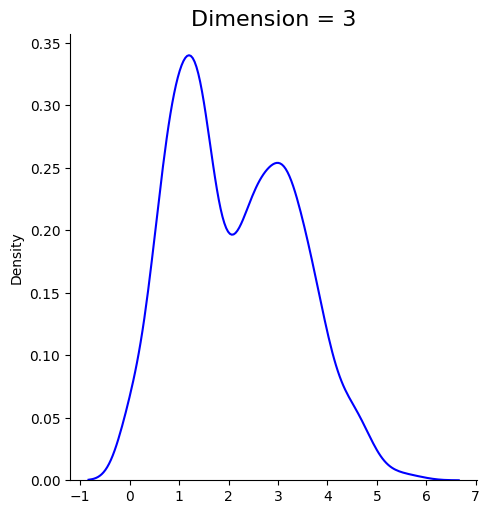

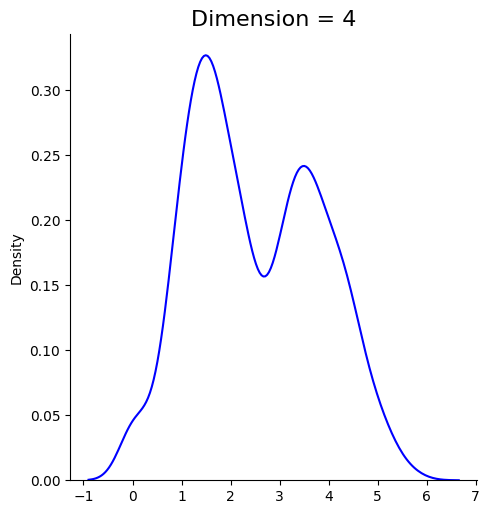

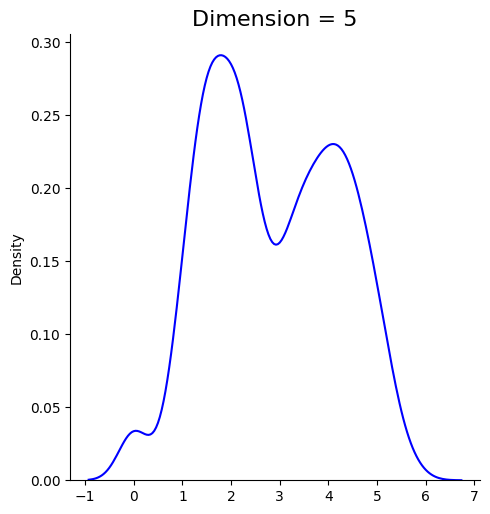

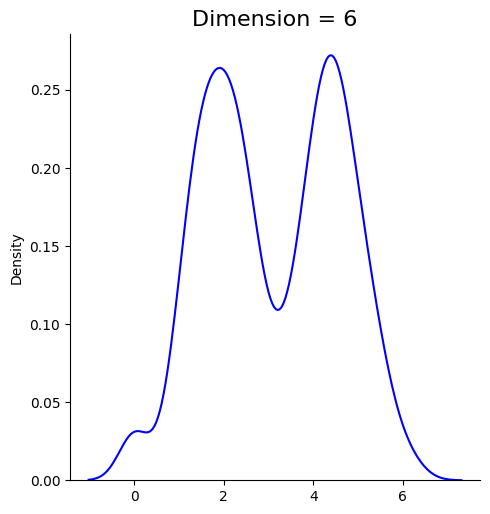

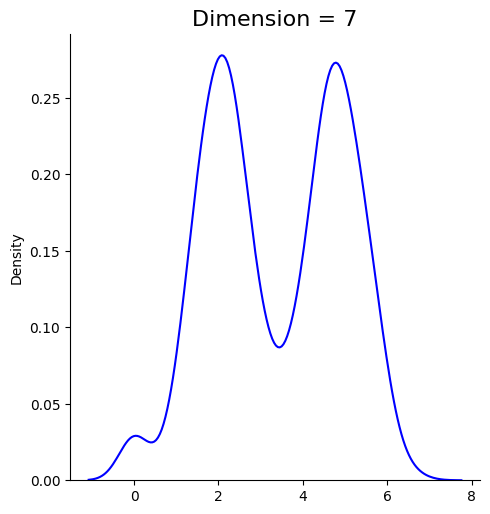

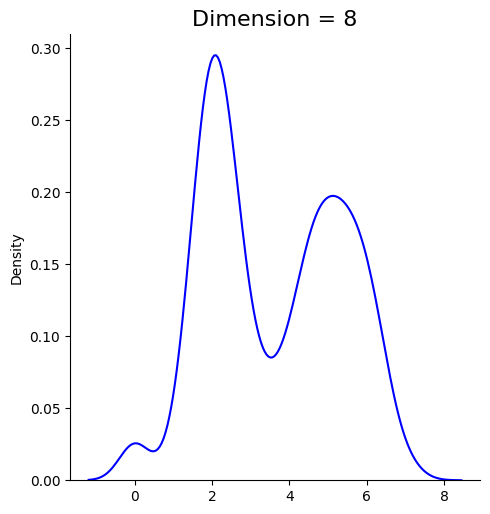

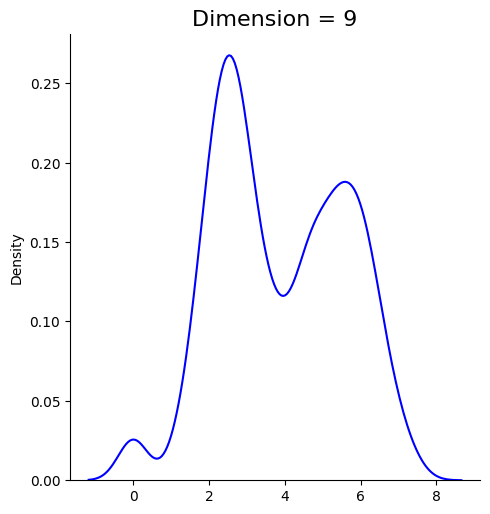

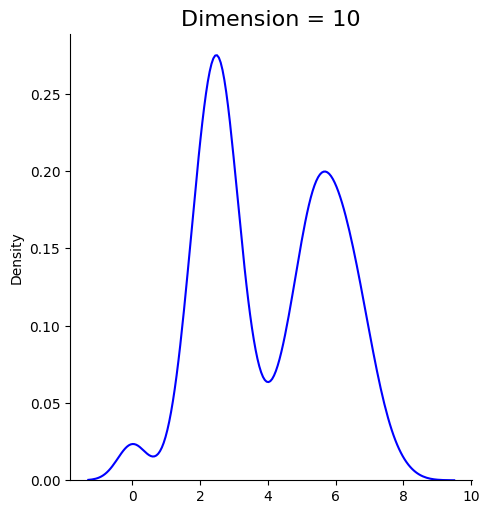

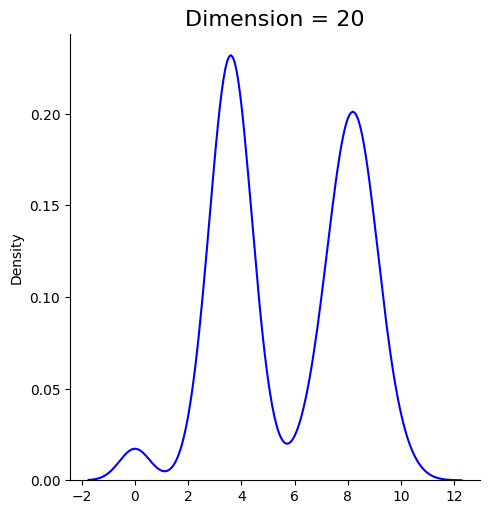

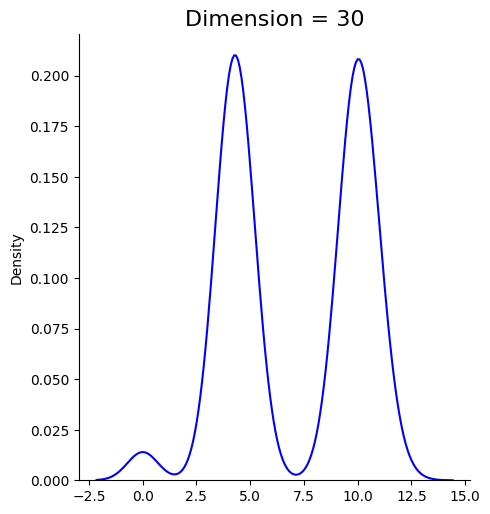

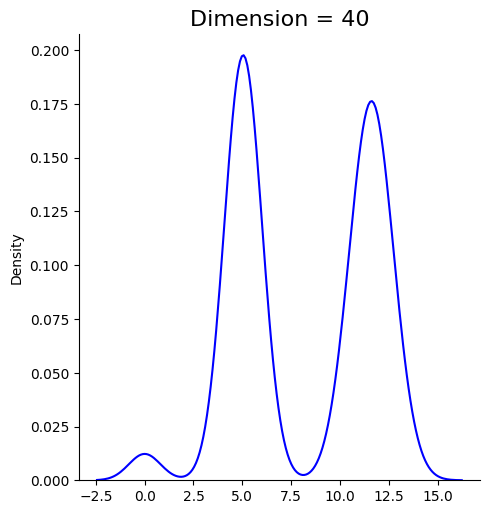

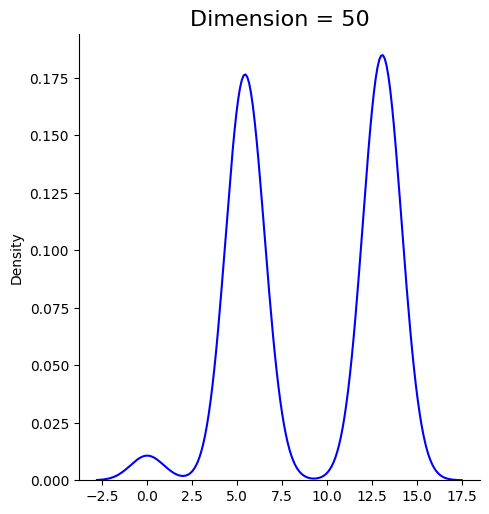

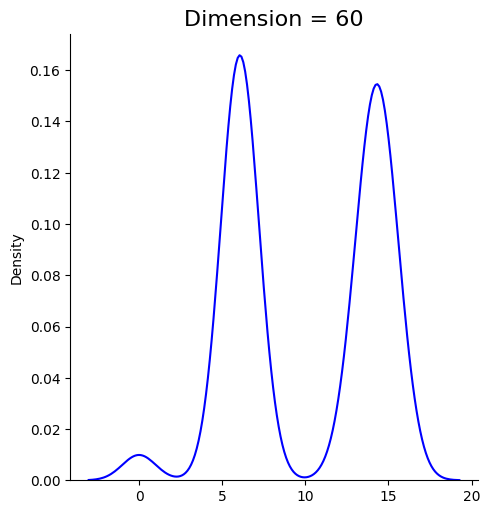

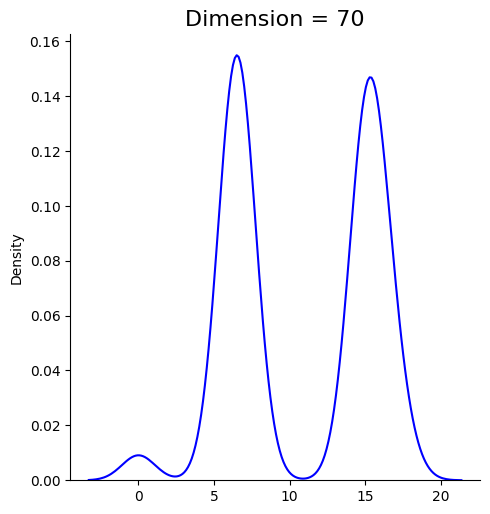

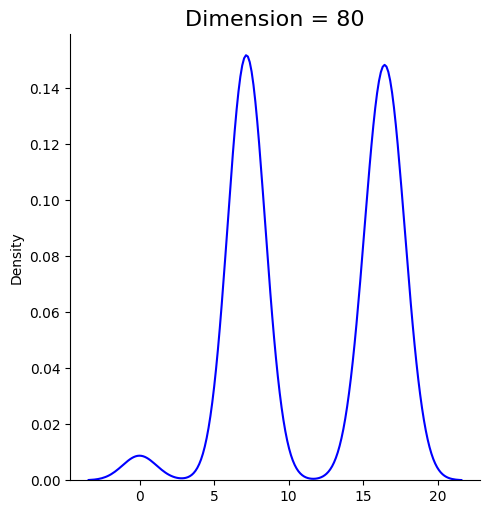

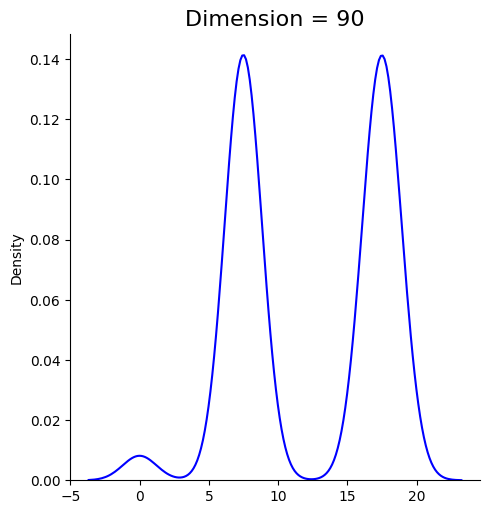

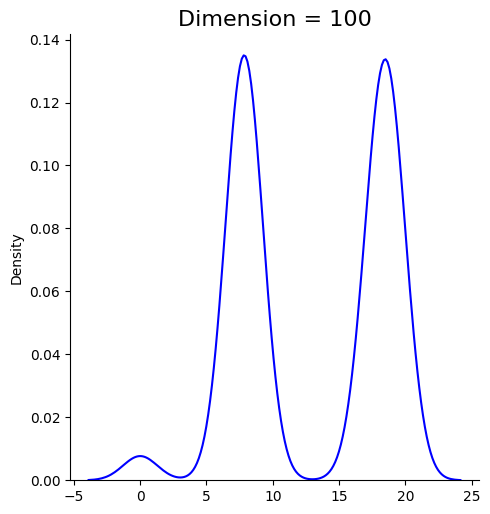

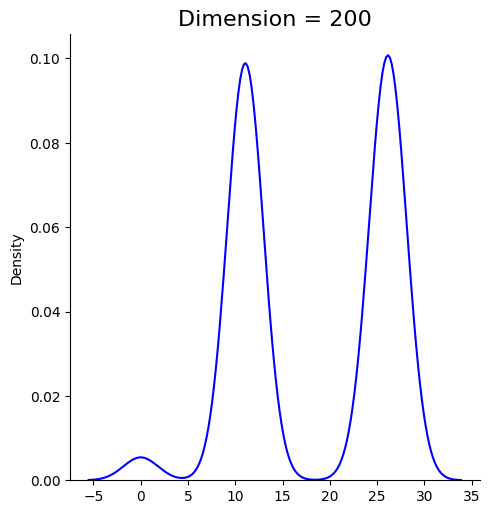

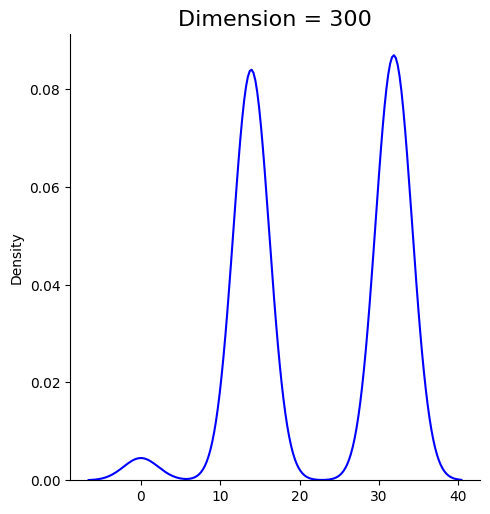

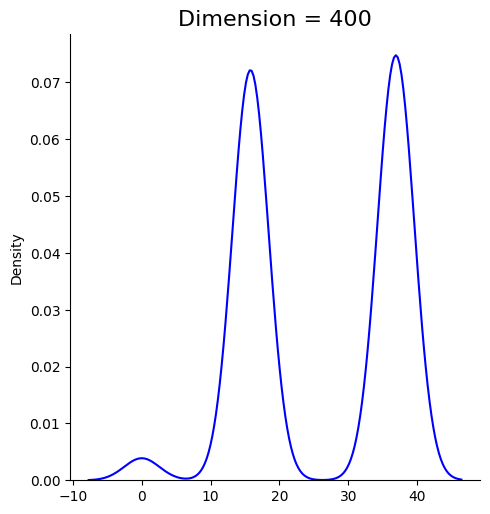

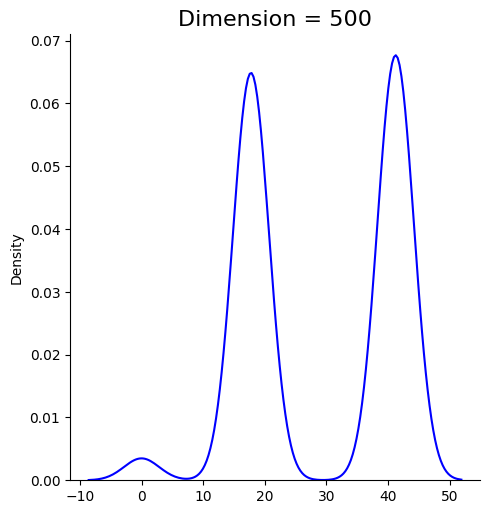

In [19]:
# Define the range of dimensions to generate data for
dims = list(range(3, 10)) + list(range(10, 110, 10)) + [100 * i for i in range(2, 6)]

# Loop through the dimensions
for dim in dims:
    # Generate the data for the current dimension
    data, distances = generate_data(samples, dim)

    # Plot the data points
   
    # Plot the distance density plot
    sns.displot(data=distances, kind="kde", color='b')
    plt.title('Dimension = %s'%dim, fontsize=16)
    plt.show()


# Another Perspective : Number of Samples Needed

## Assume we want 10 samples per unique combination of variables

## ---

## 1 Binary Variable - 2 Unique Combinations - 20 samples needed

## 2 Binary Variable - 4 Unique Combinations - 20 samples needed

## ---

## k Binary Variable - (2 raise k) Unique Combinations - 10 x (2 raise k) samples needed

In [24]:
k_values = np.arange(1,21)
samples_needed = 10*2**k_values

Text(1, 9000000.0, '10 Million')

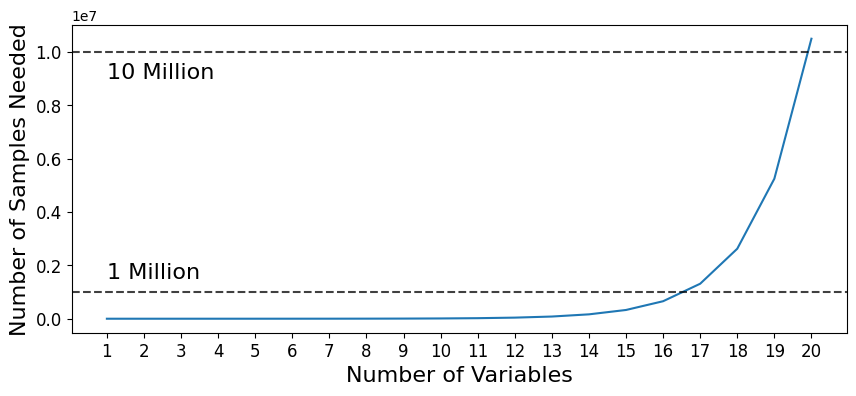

In [25]:
plt.figure(figsize=(10,4))
plt.plot(k_values, samples_needed)
plt.xlabel('Number of Variables', fontsize=16)
plt.ylabel('Number of Samples Needed', fontsize=16)
plt.xticks(k_values, fontsize=12)
plt.yticks(np.arange(0,1.2*10**7,.2*10**7), fontsize=12)
plt.axhline(10**6, linestyle='--', color='k', alpha=0.75)
plt.annotate('1 Million', (1,.15*10**7), fontsize=16)
plt.axhline(10**7, linestyle='--', color='k', alpha=0.75)
plt.annotate('10 Million', (1,.9*10**7), fontsize=16)